In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [98]:
df = pd.read_csv('../runtime/benchmark_results.csv', sep=',')

# Turn filename into short model name with regex
df[['model', 'batch']] = df['loadable'].str.extract(r'pfb_model_([^-]+)-[^-]+-t\d+-b(\d+)\.nvdla')
df['model_short'] = df['model'] + '-b' + df['batch']

# Calculate throughput
df['throughput'] = df['samples'] / df['device_time'] * 1000  # samples per second

# Calculate samples per joule
df['samples_per_joule'] = df['samples'] / df['energy']

df_stats = df.groupby(['model_short', 'batch']).agg(['mean', 'std'])
# Flatten 
df_stats.columns = ['_'.join(col) for col in df_stats.columns]
df_stats = df_stats.reset_index()

# Sort by model_short
df_stats['batch'] = df_stats['batch'].astype(int)
df_stats = df_stats.sort_values(by='batch')

# Split between dft and fft
dft_stats = df_stats[df_stats['model_short'].str.contains('dft')]
fft_stats = df_stats[df_stats['model_short'].str.contains('fft')]



/tmp/ipykernel_63869/875268696.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(dft_stats['model_short'], rotation=45, ha='right')
/tmp/ipykernel_63869/875268696.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(fft_stats['model_short'], rotation=45, ha='right')


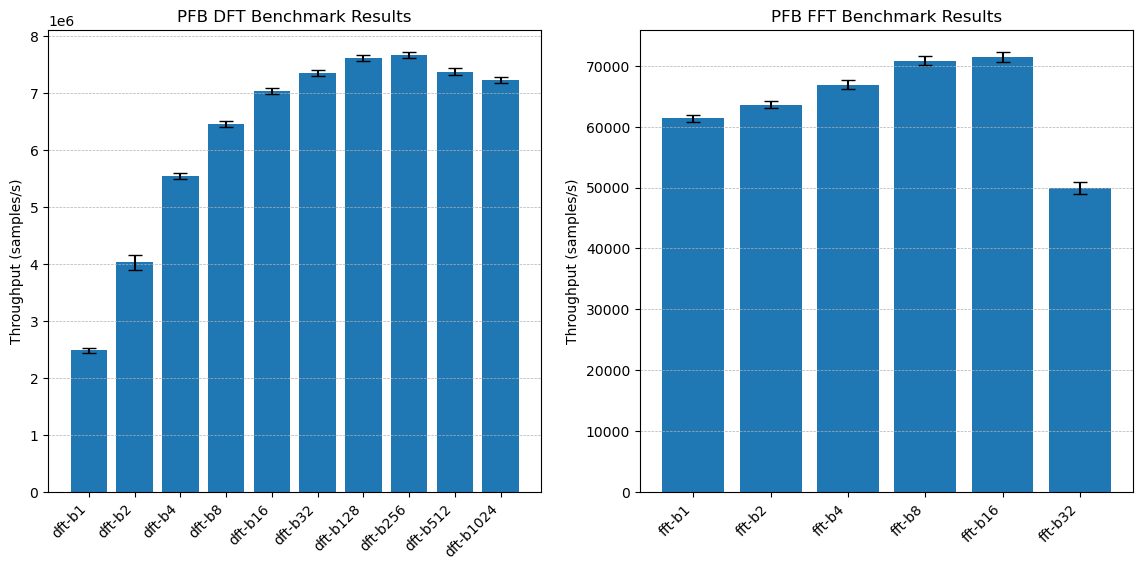

In [111]:
# Plotting of dft and fft in two different subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Plot DFT stats
axs[0].bar(dft_stats['model_short'], dft_stats['throughput_mean'], yerr=dft_stats['throughput_std'], capsize=5)
axs[0].set_title('PFB DFT Benchmark Results')
axs[0].set_ylabel('Throughput (samples/s)')
axs[0].set_xticklabels(dft_stats['model_short'], rotation=45, ha='right')
axs[0].grid(axis='y', linestyle='--', linewidth=0.5)

# Plot FFT stats
axs[1].bar(fft_stats['model_short'], fft_stats['throughput_mean'], yerr=fft_stats['throughput_std'], capsize=5)
axs[1].set_title('PFB FFT Benchmark Results')
axs[1].set_ylabel('Throughput (samples/s)')
axs[1].set_xticklabels(fft_stats['model_short'], rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='--', linewidth=0.5)

/tmp/ipykernel_63869/2189170537.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(dft_stats['model_short'], rotation=45, ha='right')
/tmp/ipykernel_63869/2189170537.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(fft_stats['model_short'], rotation=45, ha='right')


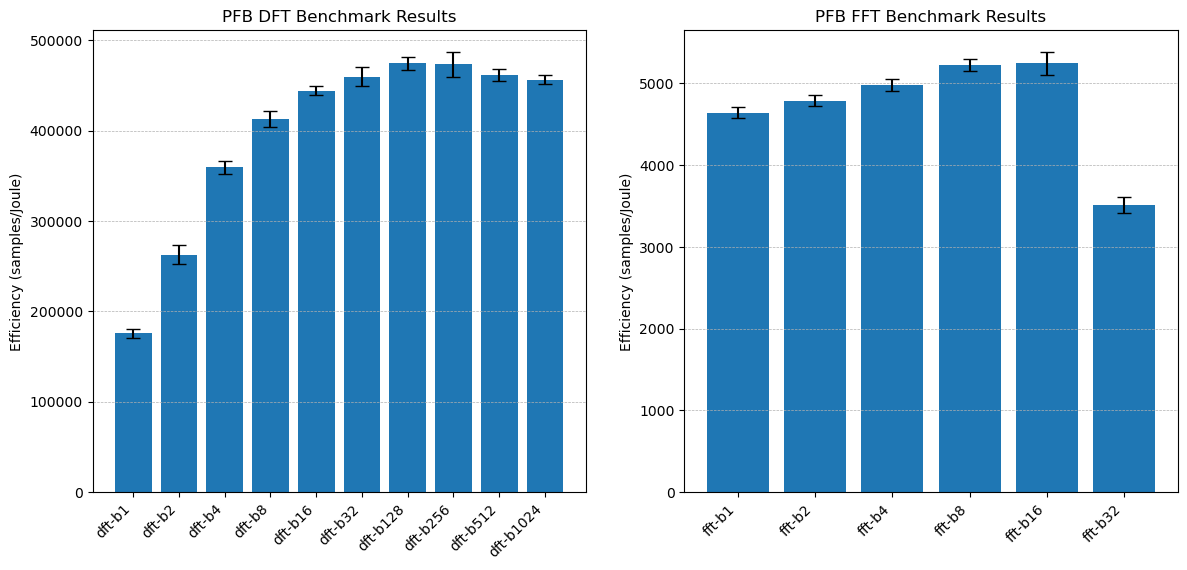

In [110]:
##### Efficiency

# Plotting of dft and fft in two different subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Plot DFT stats
axs[0].bar(dft_stats['model_short'], dft_stats['samples_per_joule_mean'], yerr=dft_stats['samples_per_joule_std'], capsize=5)
axs[0].set_title('PFB DFT Benchmark Results')
axs[0].set_ylabel('Efficiency (samples/Joule)')
axs[0].set_xticklabels(dft_stats['model_short'], rotation=45, ha='right')
axs[0].grid(axis='y', linestyle='--', linewidth=0.5)

# Plot FFT stats
axs[1].bar(fft_stats['model_short'], fft_stats['samples_per_joule_mean'], yerr=fft_stats['samples_per_joule_std'], capsize=5)
axs[1].set_title('PFB FFT Benchmark Results')
axs[1].set_ylabel('Efficiency (samples/Joule)')
axs[1].set_xticklabels(fft_stats['model_short'], rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='--', linewidth=0.5)

/tmp/ipykernel_63869/1827095407.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dft_b256_stats['dla'], rotation=45, ha='right')


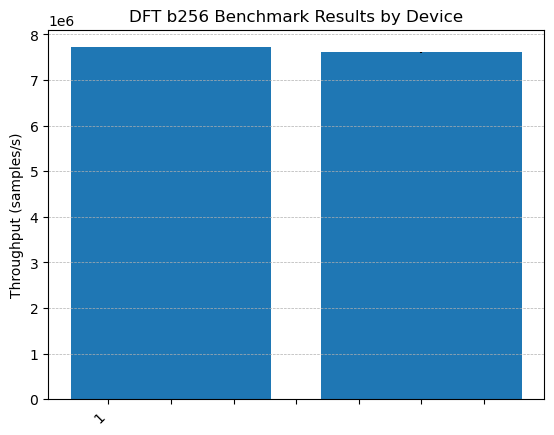

In [107]:
# Plot dft b256 for dla1 and dla2 seperately
dft_b256 = df[df['model_short'].str.contains('dft-b256')]

# Group by device and calculate mean and std
dft_b256_stats = dft_b256.groupby(['dla']).agg(['mean', 'std'])

# FLatten
dft_b256_stats.columns = ['_'.join(col) for col in dft_b256_stats.columns]
dft_b256_stats = dft_b256_stats.reset_index()


# Plot DFT b256 stats
fig, ax = plt.subplots()
ax.bar(dft_b256_stats['dla'], dft_b256_stats['throughput_mean'], yerr=dft_b256_stats['throughput_std'])
ax.set_title('DFT b256 Benchmark Results by Device')
ax.set_ylabel('Throughput (samples/s)')
ax.set_xticklabels(dft_b256_stats['dla'], rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', linewidth=0.5)

Number of samples: 49674
     marker      time  dt_micro  device_timestamp  current0  voltage0  \
3491      S  0.250265       736               332  0.790268   20.2385   
3492      S  0.250286        20               382  0.790268   20.1658   
3493      S  0.250304        18               432  0.870914   20.1295   
3494      S  0.250324        19               482  0.817151   20.1295   
3495      S  0.250342        17               533  0.682742   20.1295   

       power0  power_total  
3491  15.9938      15.9938  
3492  15.9364      15.9364  
3493  17.5311      17.5311  
3494  16.4488      16.4488  
3495  13.7433      13.7433  


/usr/lib/python3/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


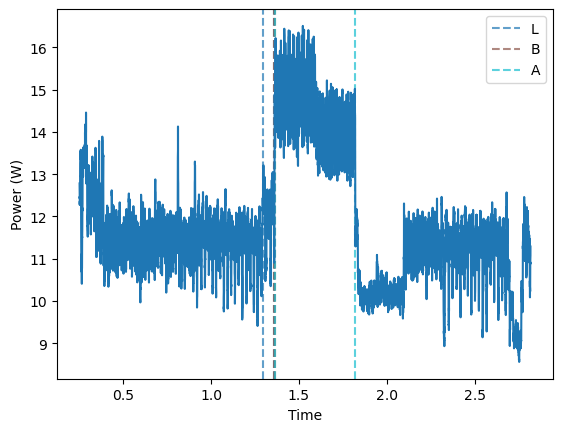

In [ ]:
# Power dump file 

df = pd.read_csv('../runtime/benchmark_dump.txt', sep=' ')

# Drop first 200 ms and after 500 ms
# df = df[df['time'] < 0.500 ]
df = df[df['time'] > 0.250 ]

samples = df[df['marker'] == 'S']
markers = df[df['marker'] != 'S']
# smoothen the power values
samples.loc[:, 'power0_smooth'] = samples['power0'].rolling(window=50, center=True).mean()
# print len of samples
print(f"Number of samples: {len(samples)}")



plt.xlabel('Time')
plt.ylabel('Power (W)')

print(df.head())

# Generate unique colors for each marker type
unique_markers = markers['marker'].unique()
colors = cm.get_cmap('tab10', len(unique_markers))  # Use a colormap with enough colors

# Plot vertical lines by marker type
for idx, marker_type in enumerate(unique_markers):
    group = markers[markers['marker'] == marker_type]
    for _, m in group.iterrows():
        plt.axvline(x=m['time'], color=colors(idx), linestyle='--', alpha=0.7, label=marker_type if _ == group.index[0] else "")


plt.plot(samples['time'], samples['power0_smooth'])

plt.legend()